In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Ushape dataset

In [2]:
udata=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Multiple CSV\Multiple CSV\1.ushape.csv",header=None)

In [3]:
udata.head()

0         1    2
0  0.031595  0.986988  0.0
1  2.115098 -0.046244  1.0
2  0.882490 -0.075756  0.0
3 -0.055144 -0.037332  1.0
4  0.829545 -0.539321  1.0

In [4]:
fv=udata.iloc[:,:2]
cv=udata.iloc[:,-1]

In [5]:
fv

0         1
0   0.031595  0.986988
1   2.115098 -0.046244
2   0.882490 -0.075756
3  -0.055144 -0.037332
4   0.829545 -0.539321
..       ...       ...
95  1.699453  0.587720
96  0.218623 -0.652521
97  0.952914 -0.419766
98 -1.318500  0.423112
99 -1.296818  0.184147

[100 rows x 2 columns]

In [6]:
cv.astype(int)

0     0
1     1
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    0
99    0
Name: 2, Length: 100, dtype: int32

In [7]:
std=StandardScaler()
p_fv=std.fit_transform(fv)

In [8]:
p_fv

array([[-0.52880272,  1.28542054],
       [ 1.82124821, -0.46607732],
       [ 0.43094924, -0.51610516],
       [-0.62663858, -0.45097084],
       [ 0.3712312 , -1.30192489],
       [ 1.81872078,  0.7346544 ],
       [ 0.07813527,  0.18433247],
       [ 0.50954902, -1.66427178],
       [-0.59739923,  0.27829883],
       [ 1.37086214,  0.22375044],
       [-0.87894137,  0.65349306],
       [ 1.69531142, -0.91174565],
       [ 1.12756772, -1.65289561],
       [ 0.81773837,  1.64300265],
       [-0.03734756,  0.53962298],
       [-0.97786341,  1.51041733],
       [-0.22465612,  1.70271788],
       [-0.22120141,  1.00868763],
       [-0.83190068,  0.93244079],
       [ 0.74779523,  0.54957438],
       [-1.2378428 ,  0.7264372 ],
       [-0.04156698, -0.71850484],
       [ 0.20764271,  0.88856402],
       [ 0.23092986, -1.16563865],
       [-1.30667592, -0.60711187],
       [-1.4065875 , -1.03687185],
       [ 0.11892081,  0.14210094],
       [ 1.89600064, -0.42653506],
       [ 1.60097254,

In [9]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(p_fv,cv.astype(int))

KNeighborsClassifier(n_neighbors=1)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

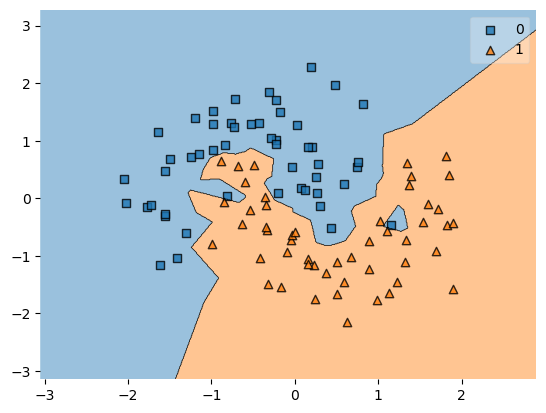

In [10]:
plot_decision_regions(X=p_fv,y=cv.astype(int).values,clf=knn)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

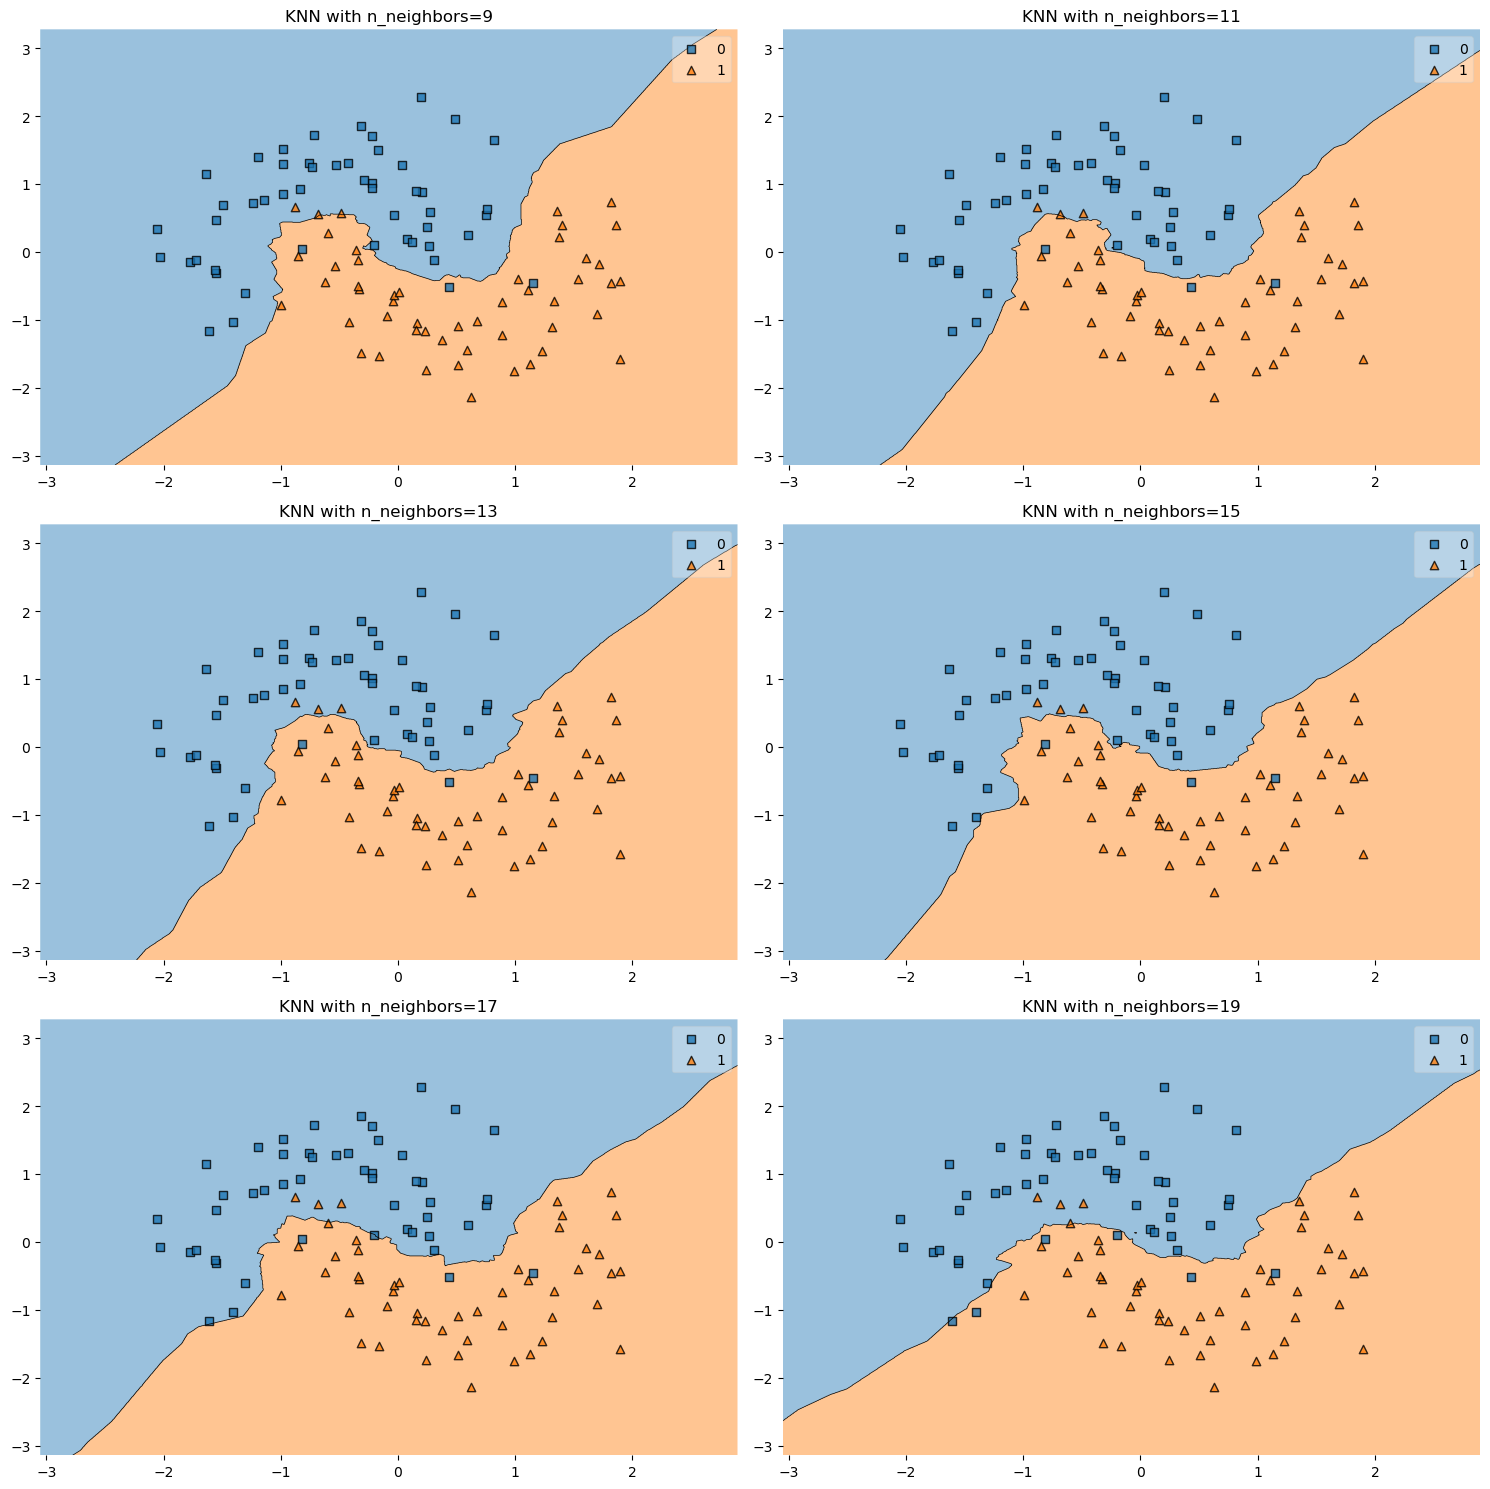

In [11]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_fv, cv.astype(int))
    plot_decision_regions(X=p_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

## Using accuracy method

In [37]:
fv

0         1
0   0.031595  0.986988
1   2.115098 -0.046244
2   0.882490 -0.075756
3  -0.055144 -0.037332
4   0.829545 -0.539321
..       ...       ...
95  1.699453  0.587720
96  0.218623 -0.652521
97  0.952914 -0.419766
98 -1.318500  0.423112
99 -1.296818  0.184147

[100 rows x 2 columns]

In [38]:
cv

0     0.0
1     1.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    0.0
99    0.0
Name: 2, Length: 100, dtype: float64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [44]:
std=StandardScaler()
px_train=std.fit_transform(x_train)
px_test=std.transform(x_test)

In [ ]:
k=[]
acc=[]
err=[]

for i in range(1,80,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(px_train,y_train)
    predicted=model.predict(px_test)
    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))

In [46]:
plt.plot(k,acc)